In [37]:
%pip install tensorflow
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [38]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,AlphaDropout
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import random

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
random.seed(42)
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
## Preprocessing of data
X_train = X_train[0:1000] 
Y_train = Y_train[0:1000] 
X_test = X_test[0:200]
Y_test = Y_test[0:200]

## Normalization of data
X_train, X_test = X_train / 255.0, X_test / 255.0 

## Building the model
model = Sequential([
    Flatten(input_shape=[28,28]),
    Dense(64, activation='selu', kernel_initializer='lecun_normal'),
    AlphaDropout(rate=0.1),
    Dense(64, activation='selu', kernel_initializer='lecun_normal'),
    AlphaDropout(rate=0.1),
    Dense(64, activation='selu', kernel_initializer='lecun_normal'),
    AlphaDropout(rate=0.1),
    Dense(10, activation='softmax')

])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


/Users/daviddevoldpearson/take-2-ML-3/.venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
nadam_optimizer = Nadam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=nadam_optimizer,metrics=['accuracy'])
history = model.fit(X_train, Y_train,epochs=50, callbacks=early_stopping, batch_size=32,  validation_split=0.2)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2300 - loss: 2.3075 - val_accuracy: 0.7150 - val_loss: 0.9913
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5525 - loss: 1.3829 - val_accuracy: 0.8050 - val_loss: 0.6804
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - loss: 0.9354 - val_accuracy: 0.8100 - val_loss: 0.6099
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7525 - loss: 0.7433 - val_accuracy: 0.8250 - val_loss: 0.5806
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7713 - loss: 0.6620 - val_accuracy: 0.8400 - val_loss: 0.6038
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8100 - loss: 0.5963 - val_accuracy: 0.8400 - val_loss: 0.5961
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8413 - loss: 0.4823 - val_accuracy: 0.8550 - val_loss: 0.5860
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8637 - loss: 0.4085 - val_accuracy: 0.8400 - val_loss:

In [41]:
test_accuracy = model.evaluate(X_test, Y_test, batch_size=32)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8200 - loss: 0.4789


In [42]:
## Montecarlo dropout
forward_passes = 20
predictions = []
for n in range(forward_passes):
    y_pred = model(X_test, training = True)
    predictions.append(y_pred.numpy())

predictions = np.stack(predictions, axis=0)
mean_prediction = predictions.mean(axis=0)
y_pred_classes = np.argmax(mean_prediction, axis=1) 

mc_dropout_accuracy = np.mean(y_pred_classes == Y_test)

print("accuracy:", mc_dropout_accuracy)


accuracy: 0.805


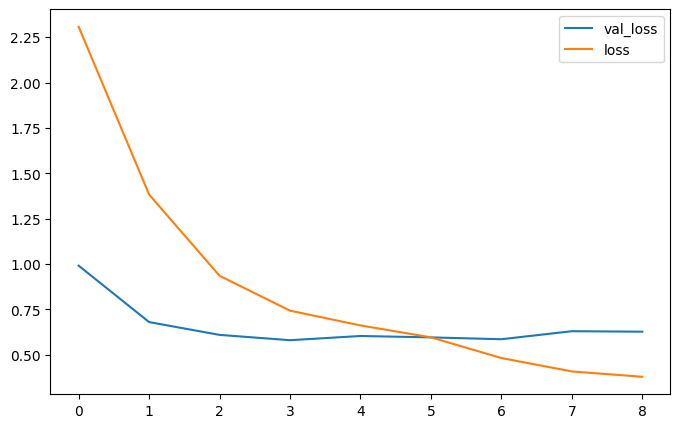

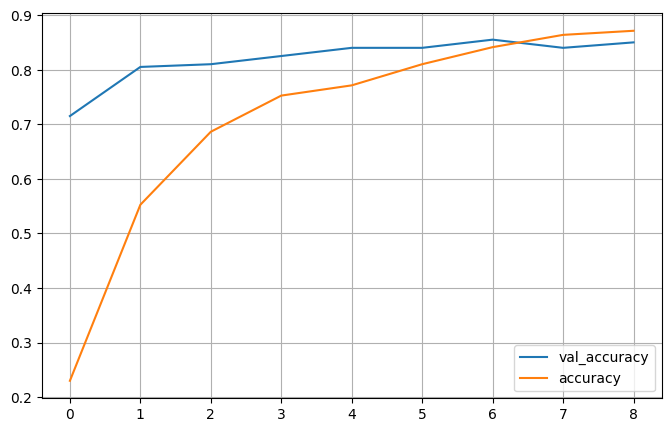

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.DataFrame(history.history)
dataframe[['val_loss', 'loss']].plot(figsize=(8,5))
dataframe[['val_accuracy', 'accuracy']].plot(figsize=(8,5))
plt.grid(True)
plt.show()